In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold,cross_validate
from sklearn.feature_selection import SelectKBest, f_classif, VarianceThreshold
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from google.colab import drive
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import  linkage
from sklearn.metrics import silhouette_score
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:



x=pd.read_csv('/content/drive/MyDrive/gisette/gisette_train.data',sep=' ',header=None)

if x.iloc[:, -1].isna().all():
    x = x.iloc[:, :-1]

y=pd.read_csv('/content/drive/MyDrive/gisette/gisette_train.labels',sep=' ',header=None,names=["label"])
y = y["label"]
y.replace(-1,0,inplace=True)  # label encoding

print('Dataset features:\n')

x



Dataset features:



,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,...,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


In [5]:

print('Dataset target:\n')  #1--> digit 4 ,0--->digit 9
y

Dataset target:



,label
0,1
1,0
2,1
3,1
4,1
...,...
5995,0
5996,1
5997,0
5998,0


# **EDA**

In [ ]:
dataset=pd.concat([x,y],axis=1)
dataset

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,label
0,550,0,495,0,0,0,0,976,0,0,...,0,0,991,991,0,0,0,0,983,1
1,0,0,0,0,0,0,0,976,0,0,...,475,0,991,0,0,991,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,674,0,0,838,1
4,0,0,0,0,0,0,0,608,0,979,...,0,0,828,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,783,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,921,0,886,0,1
5997,0,0,0,0,0,758,0,0,0,522,...,901,0,0,0,0,980,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,690,0,0,0,0,0,0


In [ ]:
dataset.info() #check dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Columns: 5001 entries, 0 to label
dtypes: int64(5001)
memory usage: 228.9 MB


In [ ]:
def return_missing_values(): #cheking for any missing values
    if dataset.isnull().sum().sum()>0:
        print('missing were found')
    else:
         print('no dmissin were found')

return_missing_values()



no dmissin were found


In [ ]:
def return_duplicates():#cheking for any duplicates
    if dataset.duplicated().any():
        print('duplicates were found')
    else:
         print('no duplicates were found')
return_duplicates()

no duplicates were found


In [ ]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,label
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,111.022833,11.251000,173.261167,0.951000,15.169167,50.209333,15.206333,323.073167,2.207667,146.355667,...,111.407500,2.035333,318.539667,81.03950,44.777333,263.813667,14.720667,122.423500,153.636000,0.500000
std,284.848291,91.448864,341.759463,25.771877,109.238579,194.682629,106.963813,418.413159,39.746428,317.863306,...,276.658528,41.781918,420.830651,256.10652,185.273192,394.966054,106.994417,294.247413,326.609648,0.500042
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,786.000000,0.000000,0.000000,...,0.000000,0.000000,790.250000,0.00000,0.000000,659.250000,0.000000,0.000000,0.000000,1.000000
max,999.000000,999.000000,999.000000,983.000000,999.000000,999.000000,999.000000,999.000000,991.000000,999.000000,...,999.000000,999.000000,999.000000,999.00000,999.000000,999.000000,999.000000,999.000000,999.000000,1.000000


In [ ]:
dataset['label'].value_counts() # check class distribution

,count
label,
1,3000
0,3000


# **preprocessing**

Handling Zero variance (Constant Features )

In [6]:

total_unique_values = x.nunique()
constant_columns = total_unique_values[total_unique_values == 1].index # columns where all values are the same
print("Number of features before dropping constant features  :", x.shape[1])

print("Number of constant features:", len(constant_columns))

x_clean=x.drop(columns=constant_columns)# drop the constant columns
print("Number of features after dropping constant features  :", x_clean.shape[1])
x_clean.columns=range(x_clean.shape[1])
x_clean

Number of features before dropping constant features  : 5000
Number of constant features: 45
Number of features after dropping constant features  : 4955


,0,1,2,3,4,5,6,7,8,9,...,4945,4946,4947,4948,4949,4950,4951,4952,4953,4954
0,550,0,495,0,0,0,0,976,0,0,...,0,0,0,991,991,0,0,0,0,983
1,0,0,0,0,0,0,0,976,0,0,...,0,475,0,991,0,0,991,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,742,0,0,0,0,684,0,956,...,0,0,0,0,0,0,674,0,0,838
4,0,0,0,0,0,0,0,608,0,979,...,991,0,0,828,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,991,0,0,0,0,0,783,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,921,0,886,0
5997,0,0,0,0,0,758,0,0,0,522,...,0,901,0,0,0,0,980,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,690,0,0,0,0,0


splitting the dataset into train & test sets

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_clean,y,test_size=0.2,random_state=42,stratify=y)
x_train.shape

(4800, 4955)

Normalization

In [ ]:
scaler=StandardScaler()
scaler.fit(x_clean)
x_scaled=scaler.transform(x_clean)

In [8]:

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)# defining the number of folds for the CV

Feature selection using ANOVA F-test

In [10]:
#choosing the number of features to keep based on the validation error
k_values = range(50, 1001, 50)
val_error=[]

for k in k_values:
  pip = Pipeline([ ("var", VarianceThreshold(threshold=0.0)),
     ('ANOVA f score', SelectKBest(score_func=f_classif,k=k)),
     ('svc', LinearSVC(max_iter=10000)) ])
  cv_results =  cross_validate(pip, x_train, y_train, cv=cv, scoring='accuracy',return_train_score=True)

  val_error.append( 1-cv_results['test_score'].mean())

#print(val_error)


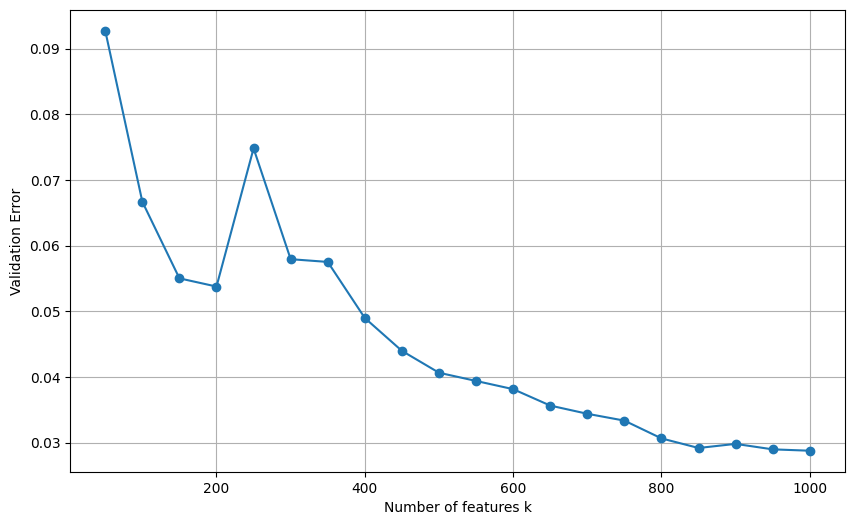

In [12]:
plt.figure(figsize=(10,6))
plt.plot(k_values, val_error, marker='o')# decide noumber of k
plt.xlabel("Number of features k")
plt.ylabel("Validation Error")
plt.grid(True)
plt.show()

In [11]:
pipeline1=Pipeline([("var", VarianceThreshold(threshold=0.0)),('scaler',StandardScaler())
 ,('feature_selection',SelectKBest(score_func=f_classif,k=600))])#preprocessing pipeline



# Linear SVM



In [13]:
clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', LinearSVC(max_iter=1000))
])#before feature selection
clf.fit(x_train,y_train)
y_pred1=clf.predict(x_test)
train_accuracy = clf.score(x_train, y_train.values.ravel())
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy_score(y_test, y_pred1))

Training Accuracy: 1.0
Test Accuracy: 0.9775


In [14]:
 pipeline1_svm=Pipeline([("var", VarianceThreshold(threshold=0.0)),('scaler',StandardScaler())
 ,('feature_selection',SelectKBest(score_func=f_classif,k=600)),('svc',LinearSVC(max_iter=1000))])

 param_grid1 = {
     'svc__C': [0.001,0.01, 0.1,1]
 }



In [24]:


grid_svm = GridSearchCV(
     estimator=pipeline1_svm,
     param_grid=param_grid1,
     cv=cv,
     scoring='accuracy',
     n_jobs=-1
 )

grid_svm.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('var', VarianceThreshold()),
                                       ('scaler', StandardScaler()),
                                       ('feature_selection',
                                        SelectKBest(k=600)),
                                       ('svc', LinearSVC())]),
             n_jobs=-1, param_grid={'svc__C': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [16]:
grid_results = pd.DataFrame(grid_svm.cv_results_)
results = grid_results[[ 'param_svc__C', 'mean_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)
print(results)

   param_svc__C  mean_test_score
0         0.001         0.974375
1         0.010         0.974375
2         0.100         0.967708
3         1.000         0.965000


In [17]:
print("Best paramters", grid_svm.best_params_)
print("Best CV accuracy:", grid_svm.best_score_)
best_estimator = grid_svm.best_estimator_


Best paramters {'svc__C': 0.001}
Best CV accuracy: 0.9743749999999999


In [18]:
def svm_stats(svm,x_test):
  if hasattr(svm, "named_steps"):
          steps = list(svm.named_steps.keys()) # for evaluating svm performance before and after feature selection
          final_step = steps[-1]
          clf = svm.named_steps[final_step]

          x_transformed = svm[:-1].transform(x_test)
  else:
          clf=svm
          x_transformed=x_test

  w=np.linalg.norm(clf.coef_)
  margin=1/w
  Hyper_distance=clf.decision_function(x_transformed)
  mean_distance=np.mean(Hyper_distance)
  std_distance=np.std(Hyper_distance)

  stats={"w":w,"margin":margin,"mean distance from hyperplane": mean_distance,"std of distance":std_distance}
  return stats


# Linear SVM Evaluation

In [19]:
svm_without_FS=svm_stats(clf,x_test)
svm_without_FS

{'w': np.float64(0.5003268345100611),
 'margin': np.float64(1.9986935159678927),
 'mean distance from hyperplane': np.float64(0.0926654339596029),
 'std of distance': np.float64(1.8452554669852776)}

In [20]:
svm_FS=svm_stats(best_estimator,x_test)
svm_FS

{'w': np.float64(0.5734844880397187),
 'margin': np.float64(1.7437263271377994),
 'mean distance from hyperplane': np.float64(0.022067848365192582),
 'std of distance': np.float64(1.5983699137136196)}

In [21]:
final_clf=best_estimator
y_pred2=final_clf.predict(x_test)

In [22]:
test_accuracy=accuracy_score(y_test,y_pred2)
print("test_accuracy",test_accuracy)
test_f1_score=f1_score(y_test,y_pred2)
print('test_f1_score',test_f1_score)

test_accuracy 0.9816666666666667
test_f1_score 0.9818181818181818


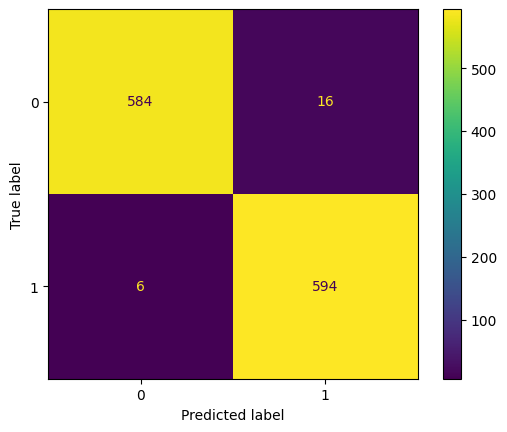

In [23]:
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


# Logistic Regression

Baseline Logistic Regression

In [ ]:
# Baseline Logistic Regression
lr_base = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(penalty='l2', solver='lbfgs', max_iter=3000))
])
lr_base.fit(x_train, y_train)
base_pred = lr_base.predict(x_test)

print('Baseline train acc:', lr_base.score(x_train, y_train))
print('Baseline test acc:', accuracy_score(y_test, base_pred))
print('Baseline test f1:', f1_score(y_test, base_pred))


Baseline train acc: 1.0
Baseline test acc: 0.9775
Baseline test f1: 0.9775933609958506


In [ ]:
pipe_lr = Pipeline([
    ("var", VarianceThreshold(threshold=0.0)),         # removes constants inside each CV fold
    ("select", SelectKBest(score_func=f_classif, k=600)),
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(penalty="l2", solver="lbfgs", max_iter=5000))
])
param_grid_lr = {

    'lr__C': [0.01, 0.1, 1],
}

In [ ]:
cv_lr = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid_lr,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1,
    return_train_score=False

)

grid_lr.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('var', VarianceThreshold()),
                                       ('select', SelectKBest(k=600)),
                                       ('scaler', StandardScaler()),
                                       ('lr',
                                        LogisticRegression(max_iter=5000))]),
             n_jobs=-1, param_grid={'lr__C': [0.01, 0.1, 1]},
             scoring='accuracy')

In [ ]:
grid_results = pd.DataFrame(grid_lr.cv_results_)
results = grid_results[['param_lr__C', 'mean_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)
print(results)
print("Best  LR params:", grid_lr.best_params_)
print("Best LR CV accuracy:", grid_lr.best_score_)

   param_lr__C  mean_test_score
1         0.10         0.974792
0         0.01         0.973750
2         1.00         0.972500
Best  LR params: {'lr__C': 0.1}
Best LR CV accuracy: 0.9747916666666666


In [ ]:
final_lr = grid_lr.best_estimator_

**Logistic Regression Evaluation**

In [ ]:
y_pred_lr = final_lr.predict(x_test)
print("LR test accuracy:", accuracy_score(y_test, y_pred_lr))
print("LR test f1 score:", f1_score(y_test, y_pred_lr))


LR test accuracy: 0.9833333333333333
LR test f1 score: 0.9834710743801653


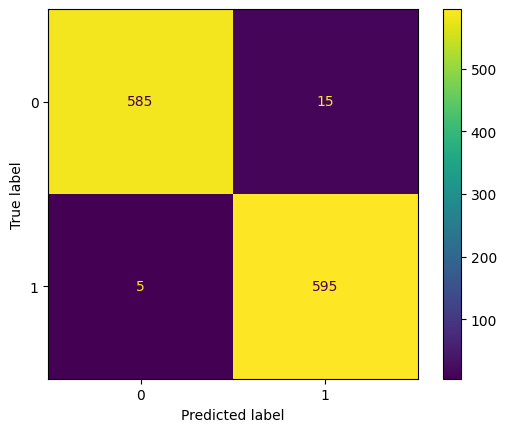

In [ ]:
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Agglomerative Hierarchical Clustering

In [ ]:

# use silhouette to find the optimal number of clusters
for k in range(2, 10):
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(x_scaled)
    sil_score = silhouette_score(x_scaled, labels)
    print(f"k={k}, Silhouette={sil_score}")

k=2, Silhouette=0.005980483642947196
k=3, Silhouette=0.005652015819429669
k=4, Silhouette=0.003727634497623908
k=5, Silhouette=-0.00873869214280132
k=6, Silhouette=-0.010381338734938022
k=7, Silhouette=-0.0099111157099618
k=8, Silhouette=-0.020826526929805078
k=9, Silhouette=-0.019903093512540986


In [ ]:
#ًWe decide the number of cluster is 2
agglo = AgglomerativeClustering(n_clusters=2)
labels = agglo.fit_predict(x_scaled)

Agglomerative Hierarchical Clustering Evaluation

In [ ]:
ARS = adjusted_rand_score(y, labels)
print("Adjusted Rand Score:", ARS)

Adjusted Rand Score: 0.055707997993491166
